In [ ]:
import numpy as np
from keras.datasets import mnist;
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#print( train_images.shape ) # wyświetla rozmiary tablicy z danymi obrazków
#print( len(train_labels) ) # długość tablicy z etykietami (podającymi wartość zakodowanej cyfry w obrazie)
#print( train_labels ) # zawartość tablicy etykiet
#print( train_images[0]) # pojedynczy wiersz danych (zakodowany pierwszy obrazek przedstawiający cyfrę)

print("Rozmiar tablicy z danymi obrazków TEST")
print(f"",test_images.shape,"\n")
print("Długość tablicy z etykietami TEST")
print(f"",len(test_labels),"\n")
print("Zawartość tablicy etykiet TEST")
print(f"",test_labels,"\n")
print("Pojedynczy wiersz danych TEST")
print(f"",test_images[0],"\n")

11490434/11490434 [==============================] - 0s 0us/step
Rozmiar tablicy z danymi obrazków TEST
 (10000, 28, 28) 

Długość tablicy z etykietami TEST
 10000 

Zawartość tablicy etykiet TEST
 [7 2 1 ... 4 5 6] 

Pojedynczy wiersz danych TEST
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0

Liczba  5


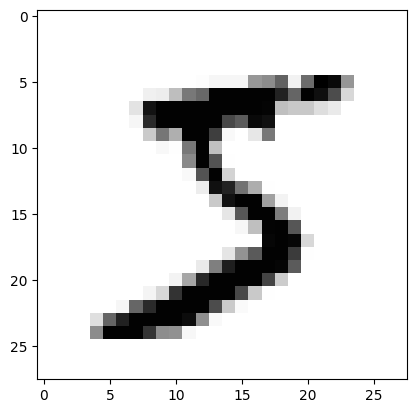

In [ ]:
import matplotlib.pyplot as plt
img = train_images[0].reshape(28,28)
plt.imshow( img, cmap='Greys')
print("Liczba ", train_labels[0])

Liczba  0


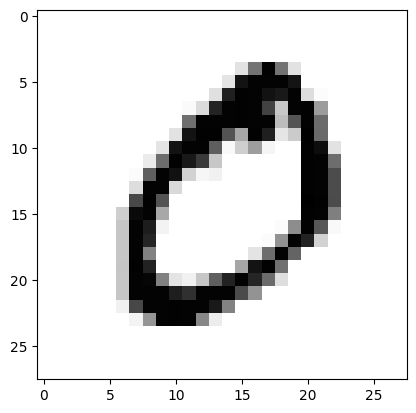

In [ ]:
import matplotlib.pyplot as plt
img = train_images[1].reshape(28,28)
plt.imshow( img, cmap='Greys')
print("Liczba ", train_labels[1])

Liczba  4


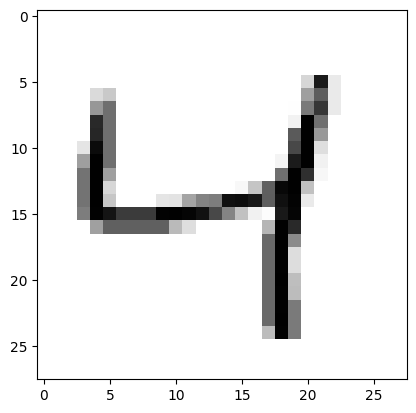

In [ ]:
import matplotlib.pyplot as plt
img = train_images[2].reshape(28,28)
plt.imshow( img, cmap='Greys')
print("Liczba ", train_labels[2])

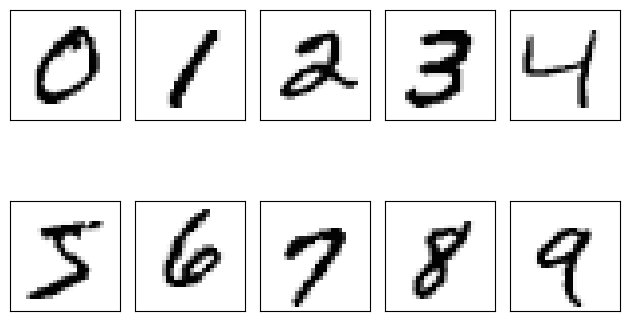

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
 img = train_images[ train_labels==i ][0].reshape(28,28)
 ax[i].imshow( img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

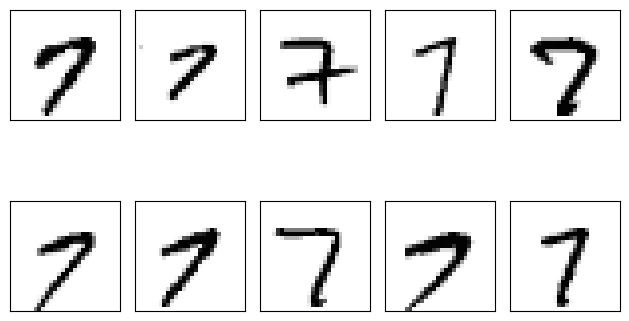

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
 img = train_images[ train_labels==7 ][i].reshape(28,28)
 ax[i].imshow( img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
x_train = train_images.reshape((60000, 28*28))
x_train = x_train.astype('float32') / 256
x_test = test_images.reshape((10000, 28*28))
x_test = x_test.astype('float32') / 256

print( train_images[0])
print( x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print( train_labels[0] )
print( y_train[0] )

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Dane treningowe

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(784, activation='relu', input_dim=784))
model.add(Dense(784, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy' ,metrics=['accuracy'] )

history = model.fit(x_train, y_train, epochs=30, batch_size=100, verbose=0)

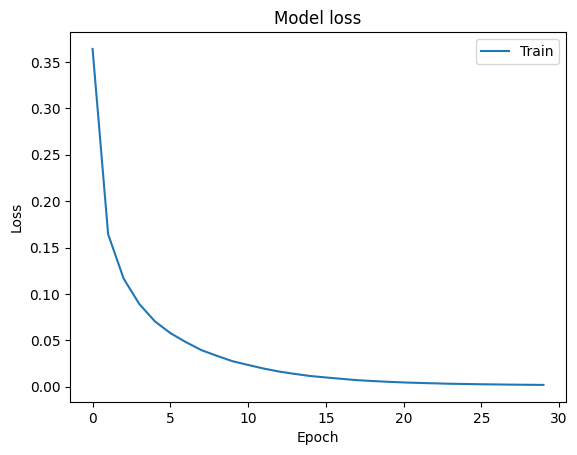

1875/1875 [==============================] - 7s 4ms/step
Liczba bledow ciagu treningowego:  0


In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

predict_x = model.predict(x_train)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(train_labels)):
 if y_result[i] != train_labels[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
from sklearn.metrics import multilabel_confusion_matrix

# Przewidywanie wyników
y_pred = model.predict(x_train)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded, average=None)
recall = recall_score(y_train, y_pred_rounded, average=None)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), train_labels)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

1875/1875 [==============================] - 7s 4ms/step
Accuracy: 1.0
Precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Confusion Matrix:
 [[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]


Dane testowe

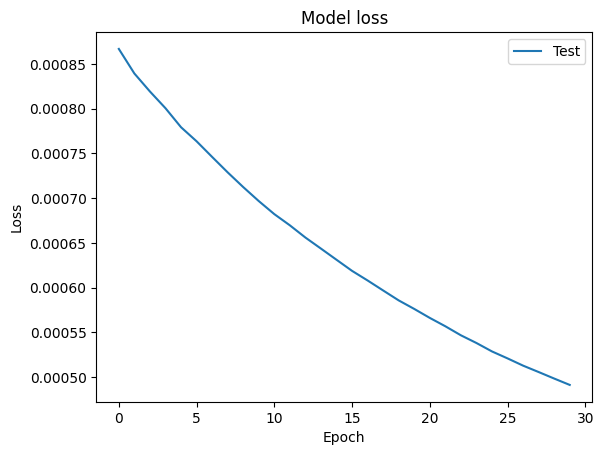

313/313 [==============================] - 1s 4ms/step
Liczba bledow ciagu testowego:  0
313/313 [==============================] - 1s 5ms/step
Accuracy: 1.0
Precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Confusion Matrix:
 [[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1032    0    0    0    0    0    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    0    0  892    0    0    0    0]
 [   0    0    0    0    0    0  958    0    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0    0  974    0]
 [   0    0    0    0    0    0    0    0    0 1009]]


In [ ]:
history = model.fit(x_test, y_test, epochs=30, batch_size=100, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper right')
plt.show()

predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(test_labels)):
 if y_result[i] != test_labels[i]:
  bledy += 1

print("Liczba bledow ciagu testowego: ", bledy)

y_pred = model.predict(x_test)

y_pred_rounded = [np.round(pred) for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average=None)
recall = recall_score(y_test, y_pred_rounded, average=None)

conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), test_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
np.argmax(predict_x, axis=-1), train_labels

(array([7, 2, 1, ..., 4, 5, 6]), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [ ]:
for i in range(9):
  print( test_labels[i], "->", y_pred_rounded[i], "\n" )


7 -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 

2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 

1 -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 

0 -> [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 

4 -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 

1 -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 

4 -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 

9 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 

5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 32ms/step
Przewidziana etykieta:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


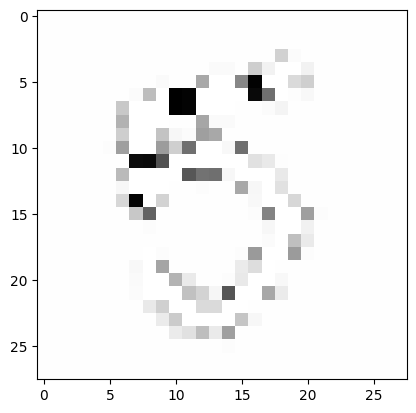

In [ ]:
import PIL
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

five = '/content/drive/MyDrive/five.png'
two = '/content/drive/MyDrive/two.png'
six = '/content/drive/MyDrive/six.png'
seven = '/content/drive/MyDrive/seven.png'
nine = '/content/drive/MyDrive/nine.png'

def returnArray(file):
  img_array = np.array(Image.open(file).convert('L'))
  x = img_array.flatten()[:28*28].reshape(1, -1)
  x[:] = 1 - x
  return x

file = returnArray(five)
predicted_label = model.predict(file)
print("Przewidziana etykieta: ",predicted_label)

import matplotlib.pyplot as plt
image = file.reshape(28,28)
plt.imshow( image, cmap='Greys')

1/1 [==============================] - 0s 61ms/step
Przewidziana etykieta:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


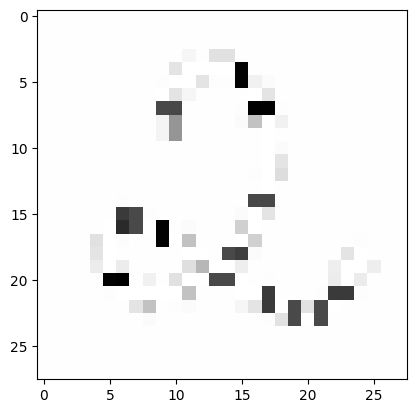

In [ ]:
file = returnArray(two)
predicted_label = model.predict(file)
print("Przewidziana etykieta: ",predicted_label)

import matplotlib.pyplot as plt
image = file.reshape(28,28)
plt.imshow( image, cmap='Greys')

1/1 [==============================] - 0s 34ms/step
Przewidziana etykieta:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


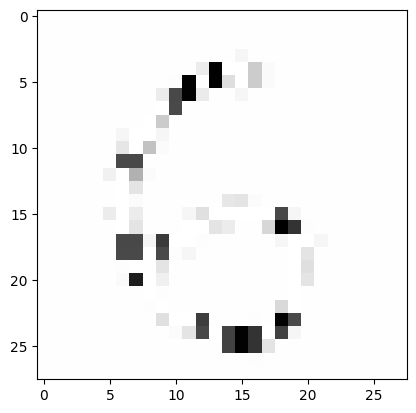

In [ ]:
file = returnArray(six)
predicted_label = model.predict(file)
print("Przewidziana etykieta: ",predicted_label)

import matplotlib.pyplot as plt
image = file.reshape(28,28)
plt.imshow( image, cmap='Greys')

1/1 [==============================] - 0s 96ms/step
Przewidziana etykieta:  [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


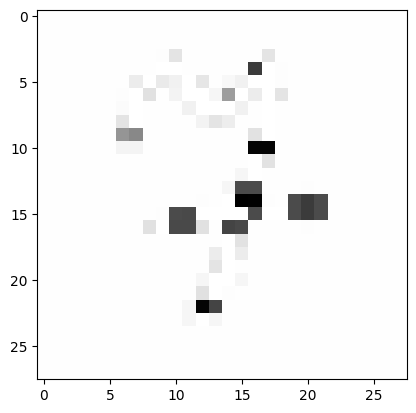

In [ ]:
file = returnArray(seven)
predicted_label = model.predict(file)
print("Przewidziana etykieta: ",predicted_label)

import matplotlib.pyplot as plt
image = file.reshape(28,28)
plt.imshow( image, cmap='Greys')

1/1 [==============================] - 0s 75ms/step
Przewidziana etykieta:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


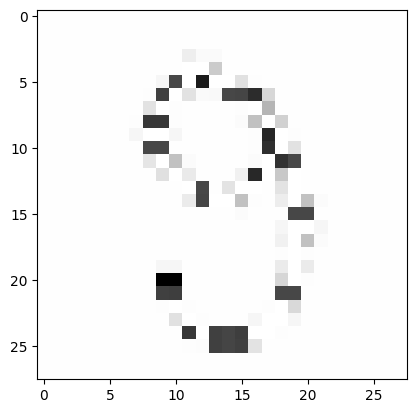

In [ ]:
file = returnArray(nine)
predicted_label = model.predict(file)
print("Przewidziana etykieta: ",predicted_label)

import matplotlib.pyplot as plt
image = file.reshape(28,28)
plt.imshow( image, cmap='Greys')